In [17]:
import os
# change the current working directory to the project root
os.chdir("/home/jianan/projects/sp")

from data.humanml3d.loader import get_dataloader

# Example opt object
class Opt:
    def __init__(self):
        self.data_root = "./dataset/HumanML3D"
        self.motion_dir = "./dataset/HumanML3D/new_joint_vecs"
        self.text_dir = "./dataset/HumanML3D/texts"
        self.max_text_len = 20
        self.min_motion_length = 40
        self.max_motion_length = 200

opt = Opt()
train_loader = get_dataloader(opt, batch_size=2, split="train")

Loading data:   0%|          | 0/23384 [00:00<?, ?it/s]

Loading data: 100%|██████████| 23384/23384 [00:06<00:00, 3739.99it/s]



--- Batch 1 ---
word_embeddings shape: torch.Size([2, 22, 300])
pos_one_hots shape: torch.Size([2, 22, 15])
Example POS one-hot vector for token 0 (sample 0): tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       dtype=torch.float64)
motions shape: torch.Size([2, 200, 263])
Number of frames: 200, Number of features: 263
Joint positions shape: (200, 22, 3)


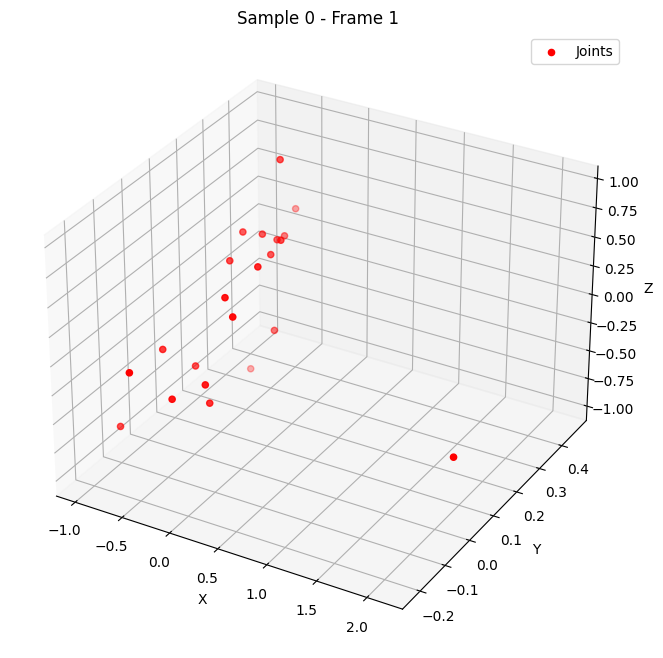

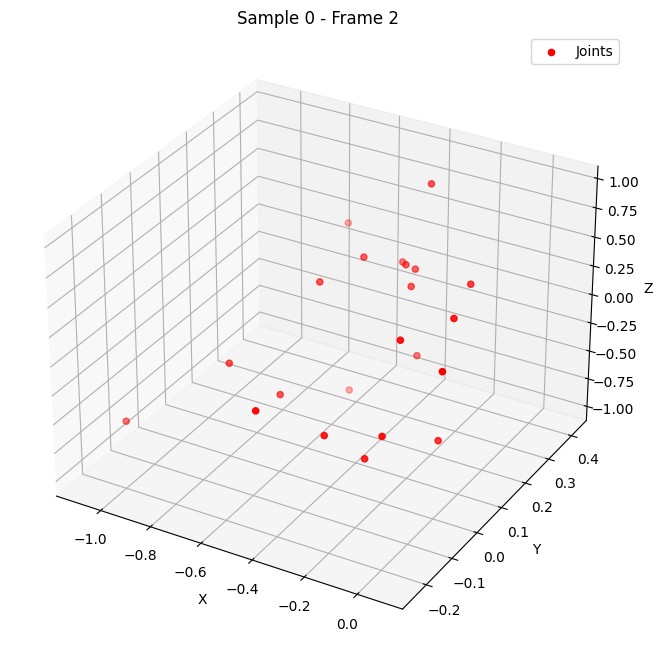

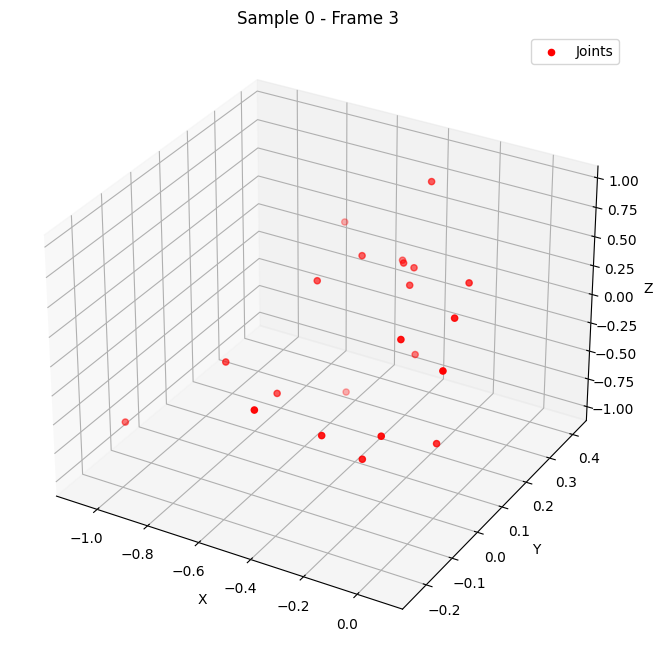

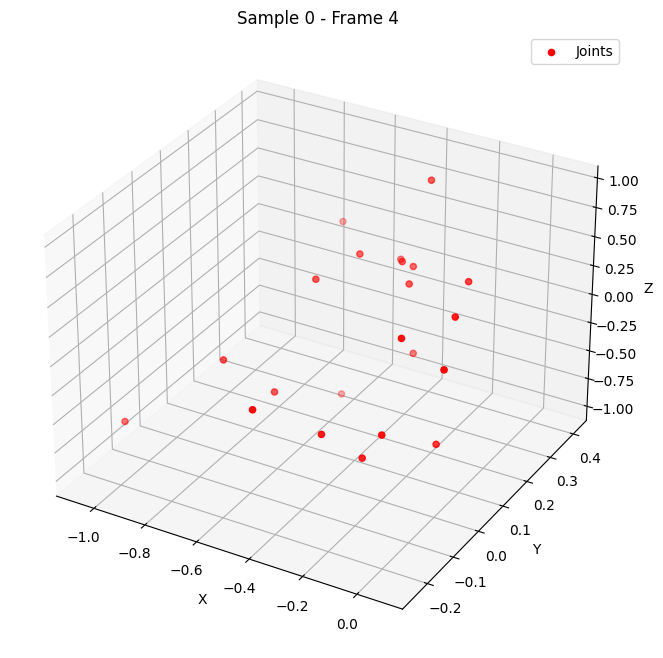

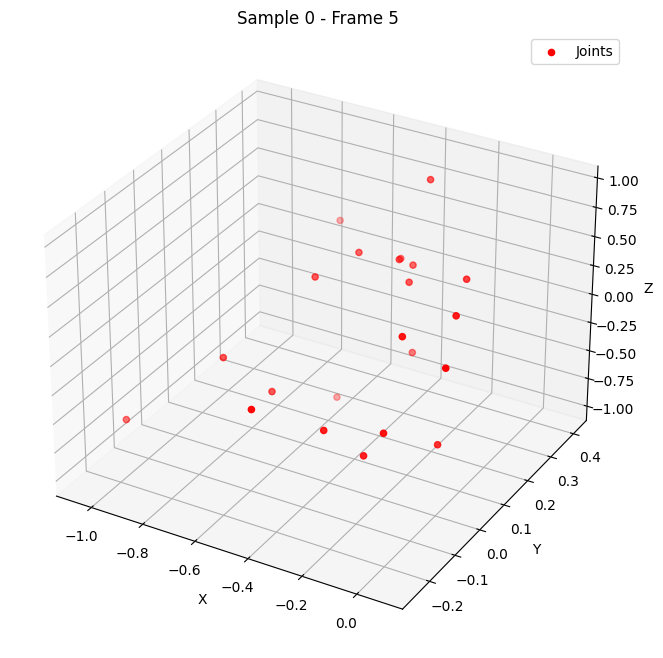

In [18]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Iterate over the dataloader
# `captions` is a is a list of captions for each motion in the batch
# `word_embeddings` (torch.Size([2, 22, 300])): [batch size, number of tokens in the processed captions, embedding size for each toke]
# `pos_one_hots` (torch.Size([2, 22, 15])): [batch size, number of tokens in the processed captions, one-hot encoding size for part-of-speech tags]
# `motions` (torch.Size([2, 200, 263])): [batch size, maximum motion length, number of features for motion]
for batch_idx, batch in enumerate(train_loader):
    word_embeddings, pos_one_hots, captions, motions = batch
    # print(word_embeddings.shape, pos_one_hots.shape, motions.shape)

    print(f"\n--- Batch {batch_idx + 1} ---")

    # Inspect word_embeddings
    print(f"word_embeddings shape: {word_embeddings.shape}")
    # print(f"Example word embedding for token 0 (sample 0): {word_embeddings[0, 0, :]}")

    # Inspect pos_one_hots
    print(f"pos_one_hots shape: {pos_one_hots.shape}")
    print(f"Example POS one-hot vector for token 0 (sample 0): {pos_one_hots[0, 0, :]}")

    # Inspect motions
    print(f"motions shape: {motions.shape}")
    # print(f"Example motion features for frame 0 (sample 0): {motions[0, 0, :]}")

    # Visualize motion (first example in batch)
    motion_sample = motions[0].numpy()  # Convert to NumPy for easier slicing
    num_frames, num_features = motion_sample.shape
    print(f"Number of frames: {num_frames}, Number of features: {num_features}")

    # Assume 3D joint data starts at index 0 (adjust if needed)
    num_joints = 22  # Change based on your dataset
    joint_positions = motion_sample[:, :num_joints * 3].reshape(num_frames, num_joints, 3)
    print(f"Joint positions shape: {joint_positions.shape}")

    # Plot joints in 3D over time (e.g., first 5 frames)
    for frame_idx in range(min(5, num_frames)):
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title(f"Sample 0 - Frame {frame_idx + 1}")
        
        # Joint positions for the current frame
        x = joint_positions[frame_idx, :, 0]
        y = joint_positions[frame_idx, :, 1]
        z = joint_positions[frame_idx, :, 2]

        # Plot the joints
        ax.scatter(x, y, z, c='r', label='Joints')

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.legend()
        plt.show()

    break


In [19]:
# change the current working directory to the project root
import numpy as np

mean = np.load("./dataset/HumanML3D/Mean.npy")
std = np.load("./dataset/HumanML3D/Std.npy")
print("Mean shape:", mean.shape)
print("Std shape:", std.shape)

raw_motion = np.load("./dataset/HumanML3D/new_joints/000000.npy")
print("Motion shape:", raw_motion.shape)

motion = np.load("./dataset/HumanML3D/new_joint_vecs/000000.npy")
print("Motion shape:", motion.shape)

Mean shape: (263,)
Std shape: (263,)
Motion shape: (116, 22, 3)
Motion shape: (116, 263)
